In [1]:
from HARK.ConsumptionSaving.ConsPortfolioModel import SequentialPortfolioConsumerType
from HARK.utilities import plot_funcs

import math
import matplotlib.pyplot as plt
import numpy as np


from scipy.optimize import fsolve

In [2]:
from macro_parameters import annual_params, quarterly_params

In [3]:
def interp_func(x, y):
    def func(z):
        return np.interp(z, x, y)

    return func

In [4]:
at = SequentialPortfolioConsumerType(**annual_params)
at.track_vars += ["aNrm", "cNrm", "mNrm", "Risky", "Share", "aLvl", "pLvl"]
at.solve()

cFunc = at.solution[0].cFuncAdj
ShareFunc = at.solution[0].ShareFuncAdj

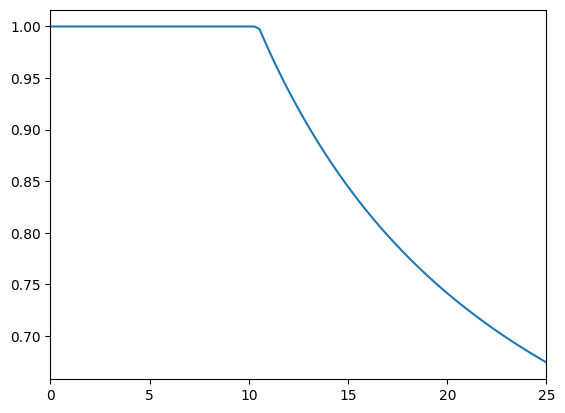

In [5]:
plot_funcs(ShareFunc, 0, 25)

In [6]:
# where do these come from?
dividend_growth_rate = 1.000203


dividend_std = 0.011983
dividend_shock_std = dividend_std / math.sqrt(dividend_growth_rate)


def price_dividend_ratio_random_walk(DiscFac, CRRA, days_per_quarter=90):
    # Assuming DiscFac in argument in quarterly

    DiscFac_daily = DiscFac ** (1.0 / days_per_quarter)

    subjective_return = (
        dividend_growth_rate ** (1 - CRRA)
        * DiscFac_daily
        * (dividend_shock_std**2 + 1) ** (CRRA * (CRRA - 1) / 2)
    )

    print("subjective_return: " + str(subjective_return))

    return subjective_return < 1

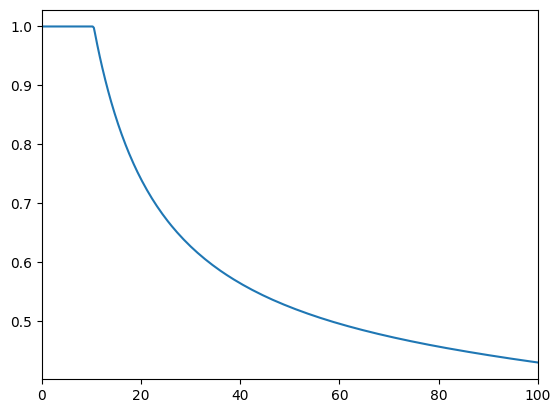

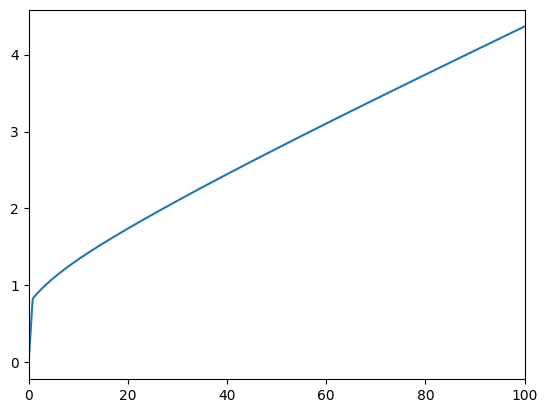

m - E[m] linear interp roots: [16.30354294]


C:\Users\alujan\AppData\Local\Temp\ipykernel_54504\3636543454.py:27: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  f"m - E[m] linear interp roots: {fsolve(interp_func(mNrm, mNrm - mNrm_next), [mNrm[0]])}"


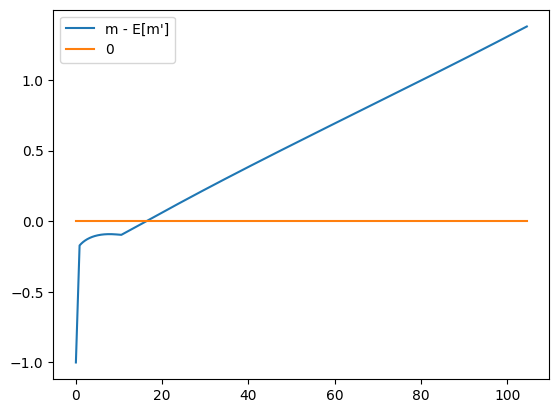

In [7]:
agent_parameters = annual_params.copy()


agent = SequentialPortfolioConsumerType(**agent_parameters)
agent.solve()


plot_funcs(agent.solution[0].ShareFuncAdj, 0, 100)
plot_funcs(agent.solution[0].cFuncAdj, 0, 100)

cFunc = agent.solution[0].cFuncAdj
ShareFunc = agent.solution[0].ShareFuncAdj
mNrm = cFunc.x_list
share = ShareFunc.y_list
aNrm = mNrm - cFunc.y_list
mNrm_next = (
    aNrm
    * (share * agent_parameters["RiskyAvg"] + (1 - share) * agent.parameters["Rfree"])
    + 1
)

# plt.plot(mNrm, cFunc(mNrm), label="c")

plt.plot(mNrm, mNrm - mNrm_next, label="m - E[m']")

print(
    f"m - E[m] linear interp roots: {fsolve(interp_func(mNrm, mNrm - mNrm_next), [mNrm[0]])}"
)

plt.plot(mNrm, np.zeros_like(mNrm), label="0")

# plt.plot(mNrm, (mNrm - cFunc(mNrm)) * ShareFunc(mNrm), label ="wealth-into-market" )

plt.legend()

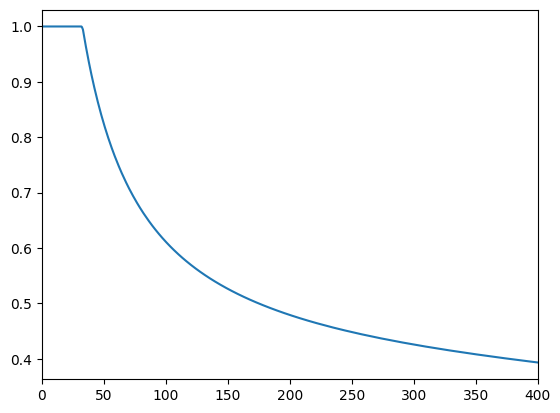

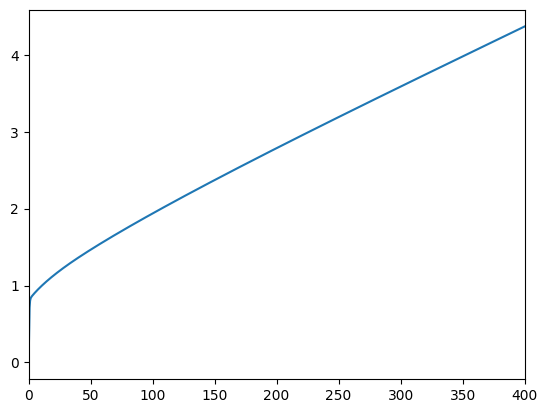

m - E[m] linear interp roots: [55.42004702]


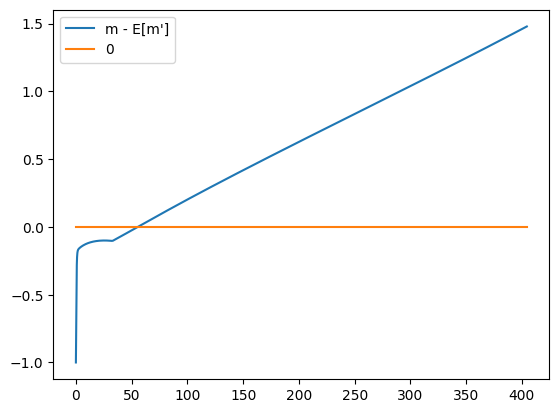

In [8]:
agent_parameters = quarterly_params.copy()


agent = SequentialPortfolioConsumerType(**agent_parameters)
agent.solve()


plot_funcs(agent.solution[0].ShareFuncAdj, 0, 400)
plot_funcs(agent.solution[0].cFuncAdj, 0, 400)

cFunc = agent.solution[0].cFuncAdj
ShareFunc = agent.solution[0].ShareFuncAdj
mNrm = cFunc.x_list
share = ShareFunc.y_list
aNrm = mNrm - cFunc.y_list
mNrm_next = (
    aNrm
    * (share * agent_parameters["RiskyAvg"] + (1 - share) * agent.parameters["Rfree"])
    + 1
)

# plt.plot(mNrm, cFunc(mNrm), label="c")

plt.plot(mNrm, mNrm - mNrm_next, label="m - E[m']")

print(
    f"m - E[m] linear interp roots: {fsolve(interp_func(mNrm, mNrm - mNrm_next), [mNrm[0]])}"
)

plt.plot(mNrm, np.zeros_like(mNrm), label="0")

# plt.plot(mNrm, (mNrm - cFunc(mNrm)) * ShareFunc(mNrm), label ="wealth-into-market" )

plt.legend()